# An Introduction to pandas

**Requirements**: in order to execute this notebook, you will need the `pandas`, `matplotlib`, and `numpy` packages.

You can install them by either running `pip3 install --user numpy pandas matpoltlib` in your terminal, or executing the next cell.


N.B.: in either case, make sure that you install them on the same python that you are using for the kernel of this notebook.

In [28]:
!pip3 install --user numpy pandas matpoltlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Now we can import the packages, using `pd`, `np`, and `plt` as shorthand for `pandas`, `numpy`, and `matplotlib`, respectively.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Okay, so what is pandas?

pandas is a library that provides data analysis tools and structures for python.

The fundemental structure is the **pandas DataFrame**, a data table like you might see in Excel, or any other spreadsheet or database.

Much of the rest of pandas provides tools and functions to manipulate these DataFrames

# Let's see some code

Here is an example DataFrame, that we read in from the csv file `Sample_data.csv`. We print the first 5 entries using the function `.head()`.

In [30]:
df = pd.read_csv('Sample_data.csv', delimiter = ',')
print(df.head())

   entry  subentry         pt       eta       phi      mass
0      0         0  41.156140 -0.454712 -2.491699  0.105713
1      0         1  40.389810 -0.233673  0.681396  0.105713
2      2         0  29.009573  1.445312 -2.372070  0.105713
3      2         1  14.167344  1.373779  1.144287  0.105713
4      4         0  93.018745 -0.760254  0.094955  0.105713


What do we see here? For each entry, in this case each entry is a particle, we see various columns, each with some attribute corresponding to that event. 

## Indexing

Indexing DataFrames is similiar to lists and numpy arrays, wich the added bonus that we can refer to columns by name. We can use iloc to refer to a particular index in the dataframe, i.e. (row, column).

In [31]:
print("All columns' values for first event:")
print(df.iloc[0,:])
print("Third column value for first event:")
print(df.iloc[0,2])

All columns' values for first event:
entry        0.000000
subentry     0.000000
pt          41.156140
eta         -0.454712
phi         -2.491699
mass         0.105713
Name: 0, dtype: float64
Third column value for first event:
41.15614


We can also access specfic columns by name directly, which returns a pandas Series

In [32]:
print(df['pt'])

0       41.156140
1       40.389810
2       29.009573
3       14.167344
4       93.018745
          ...    
7005    55.728530
7006    40.600178
7007    55.219284
7008    45.488670
7009    51.894005
Name: pt, Length: 7010, dtype: float64


Or using `.loc()` we can access using column names, in this example, just for the first 3 events:

In [33]:
print(df.loc[:2,['pt', 'eta']])

          pt       eta
0  41.156140 -0.454712
1  40.389810 -0.233673
2  29.009573  1.445312


We can also index using values of the columns. Here we select ony rows of the original DataFrame which have more pT > 100 and assign it to a new DataFrame.

In [39]:
df_pt100 = df[df['pt'] > 100]
print("New DataFrame")
print(df_pt100)
print("Old DataFrame shape:", df.shape)
print("New DataFram shape:", df_pt100.shape)

New DataFrame
      entry  subentry          pt       eta       phi      mass
17       32         0  143.901060 -0.589722  0.319763  0.105713
54      104         0  118.730910 -0.604614  2.487305  0.105713
78      147         0  111.232790 -0.491760 -0.774414  0.105713
90      167         0  168.571720 -1.301025 -3.073730  0.105713
102     180         0  129.829710 -1.123779  1.806396  0.105713
...     ...       ...         ...       ...       ...       ...
6870  13077         0  103.694220 -1.097900 -0.560181  0.105713
6873  13081         0  126.530760  2.109863 -2.864258  0.105713
6916  13156         0  137.644580  0.217377  0.658936  0.105713
6917  13156         1  110.041435  2.197266 -2.919922  0.105713
6962  13213         0  222.898450 -0.768921 -1.298584  0.105713

[169 rows x 6 columns]
Old DataFrame shape: (7010, 6)
New DataFram shape: (169, 6)


We can get fancier, but the idea is the same

In [56]:
selection = (abs(df['eta']) < 1.0) & (df['pt'] > 20) & (df['mass'] < 1)
df_new = df[selection]
print("Old DataFrame shape:", df.shape)
print("New DataFram shape:", df_new.shape)

Old DataFrame shape: (7010, 6)
New DataFram shape: (2193, 6)


## Visualization

In the previous cell, we applied some selection on the original dataframe. Let's check out the distributions and see if our selections worked as expected, using pandas' built-in `.hist()` function.

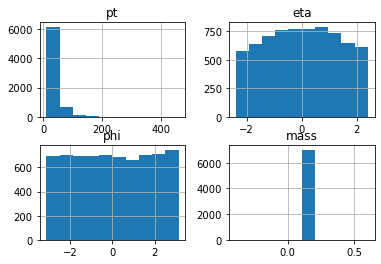

In [57]:
_ = df.hist(column = ['pt', 'eta', 'phi', 'mass'])

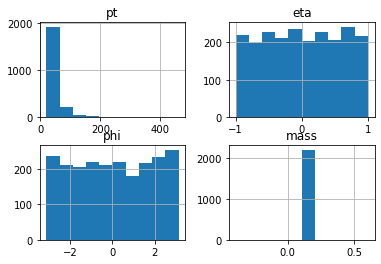

In [58]:
_ = df_new.hist(column = ['pt', 'eta', 'phi', 'mass'])

Indeed, we can see the selections worked as expected. `.hist()` is nice, but often times, we'll want to use matplotlib to make the plots. Here is an example of how we might do that.

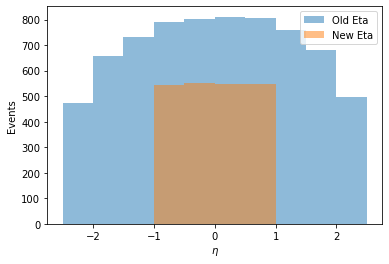

In [71]:
eta = df['eta']
eta_new = df_new['eta']
bins = [-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5]

fig = plt.figure()
ax = fig.subplots()
_ = ax.hist(eta, bins=bins, alpha=0.5,label='Old Eta')
_ = ax.hist(eta_new, bins=bins, alpha=0.5, label='New Eta')
_ = ax.set_xlabel("$\eta$")
_ = ax.set_ylabel("Events")
_ = ax.legend()

## Manipulation

We can easily add new columns to a DataFrame. For example, we can define a new variable `x = pt * np.cos(phi)` (the Cartesian x variable!) and add it as a column.

In [76]:
df['x'] = df['pt']*np.cos(df['phi'])
print(df.head())

   entry  subentry         pt       eta       phi      mass          x
0      0         0  41.156140 -0.454712 -2.491699  0.105713 -32.766390
1      0         1  40.389810 -0.233673  0.681396  0.105713  31.370517
2      2         0  29.009573  1.445312 -2.372070  0.105713 -20.835925
3      2         1  14.167344  1.373779  1.144287  0.105713   5.860963
4      4         0  93.018745 -0.760254  0.094955  0.105713  92.599707


We can also target specific entries, and modify them.

In [78]:
print(df.head())
df.loc[0,'pt'] = 0
print(df.head())

   entry  subentry         pt       eta       phi      mass          x
0      0         0  41.156140 -0.454712 -2.491699  0.105713 -32.766390
1      0         1  40.389810 -0.233673  0.681396  0.105713  31.370517
2      2         0  29.009573  1.445312 -2.372070  0.105713 -20.835925
3      2         1  14.167344  1.373779  1.144287  0.105713   5.860963
4      4         0  93.018745 -0.760254  0.094955  0.105713  92.599707
   entry  subentry         pt       eta       phi      mass          x
0      0         0   0.000000 -0.454712 -2.491699  0.105713 -32.766390
1      0         1  40.389810 -0.233673  0.681396  0.105713  31.370517
2      2         0  29.009573  1.445312 -2.372070  0.105713 -20.835925
3      2         1  14.167344  1.373779  1.144287  0.105713   5.860963
4      4         0  93.018745 -0.760254  0.094955  0.105713  92.599707


DataFrames can also be combined. For this, let's create a couple of smaller DataFrames and stack them on top of each other.

In [80]:
df_a = pd.DataFrame()
df_a['x'] = np.random.random(10)
df_a['y'] = np.random.random(10)

df_b = pd.DataFrame()
df_b['x'] = np.random.random(10)
df_b['y'] = np.random.random(10)

df_concat = pd.concat((df_a, df_b))
print(df_concat)

          x         y
0  0.143171  0.073983
1  0.551384  0.311224
2  0.654805  0.842063
3  0.110548  0.717957
4  0.160993  0.871987
5  0.614199  0.974384
6  0.110137  0.280677
7  0.074545  0.725421
8  0.407666  0.007881
9  0.030120  0.660900
0  0.474297  0.565678
1  0.537274  0.599558
2  0.234976  0.210113
3  0.085887  0.553467
4  0.291972  0.300663
5  0.409298  0.795164
6  0.131873  0.963827
7  0.835257  0.538052
8  0.494315  0.654342
9  0.383735  0.045866


We can also combine them on the column axis.

In [83]:
df_a = pd.DataFrame()
df_a['x'] = np.random.random(10)
df_a['y'] = np.random.random(10)

df_b = pd.DataFrame()
df_b['z'] = np.random.random(10)
df_b['mass'] = np.random.random(10)

df_concat = pd.concat((df_a, df_b), axis=1)
print(df_concat)

          x         y         z      mass
0  0.443721  0.057798  0.394995  0.128684
1  0.732605  0.771583  0.915912  0.541600
2  0.883849  0.729666  0.519045  0.440300
3  0.301332  0.522619  0.161167  0.032508
4  0.717598  0.236182  0.450888  0.992166
5  0.948683  0.852755  0.478133  0.083454
6  0.527211  0.787870  0.641544  0.303282
7  0.007379  0.313657  0.275702  0.601224
8  0.977876  0.540685  0.956402  0.945589
9  0.201200  0.705135  0.021355  0.179796


# Concluding Remark
pandas is a very powerful and well-supported tool for data analysis, in particular for the manipulation of tabular data. It is well integrated with numpy and matplotlib, as well as other common scientific packages of the Python ecosystem. In this tutorial we only covered the absolute basics of the tool, you are encouraged to explore [pandas' documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) for more tutorials and references for the many tools that they provide.

-- Luca Lavezzo 1/5/2023